In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering

In [5]:
def loadData(filename):
    df=pd.read_csv(filename,index_col=0)
    return df.values[:,:-3]

def IQR(data):
    q75=np.quantile(data,0.75,axis=0)
    q25=np.quantile(data,0.25,axis=0)
    iqr=q75-q25
    up_limit=q75+3*iqr
    down_limit=q25-3*iqr
    result=[]
    for i in range(len(data)):
        if (data[i]<=up_limit).all() and (data[i]>=down_limit).all():
            result.append(data[i])
    return np.array(result)

def LOF(data):
    predict = pd.DataFrame(data)
    clf = LocalOutlierFactor(n_neighbors=6, algorithm='auto', contamination=0.1, n_jobs=-1)
    clf.fit(data)
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    predict['local outlier factor'] = -clf.negative_outlier_factor_
    outliers = predict[predict['local outlier factor'] > 1].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= 1].sort_values(by='local outlier factor')
    inliers = inliers.astype(float)
    return inliers.iloc[:, :-2].values

def MinMaxscaler(data):
    return (data-np.min(data,axis=0))/(np.max(data,axis=0)-np.min(data,axis=0))

def Standardscaler(data):
    return (data-np.mean(data,axis=0))/np.std(data,axis=0)

def Normalize(data):
    norm = np.linalg.norm(data, axis=0)
    return data / norm

def PCA_(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)

def visible_init(data):
    plt.scatter(data[:,0],data[:,1])
    plt.show()

def kmeans(data,k):
    clf = KMeans(n_clusters=k,init='random')
    labels = clf.fit_predict(data)
    plt.scatter(data[:,0],data[:,1],c=labels)

def kmeans_pp(data,k):
    clf = KMeans(n_clusters=k,init='k-means++')
    labels = clf.fit_predict(data)
    plt.scatter(data[:,0],data[:,1],c=labels)

def h_clustering_group_avg(data,k):
    clf = AgglomerativeClustering(n_clusters=k,linkage='average')
    labels = clf.fit_predict(data)
    plt.scatter(data[:,0],data[:,1],c=labels)

def h_clustering_single_link(data,k):
    clf=AgglomerativeClustering(n_clusters=k,linkage='ward')
    labels=clf.fit_predict(data)
    plt.scatter(data[:,0],data[:,1],c=labels)

def h_clustering_complete_link(data,k):
    clf = AgglomerativeClustering(n_clusters=k,linkage='complete')
    labels = clf.fit_predict(data)
    plt.scatter(data[:,0],data[:,1],c=labels)

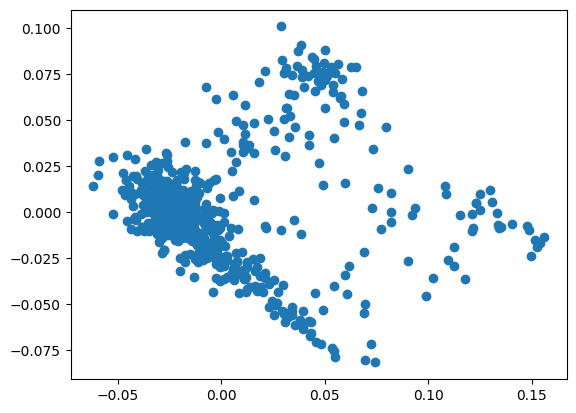

In [6]:
data = loadData('clustering_data.csv')
IQR_data = IQR(data)
LOF_data = LOF(data)
min_max_data = MinMaxscaler(LOF_data)
std_data = Standardscaler(LOF_data)
normalize_data = Normalize(LOF_data)
pca_data = PCA_(normalize_data)
visible_init(pca_data)

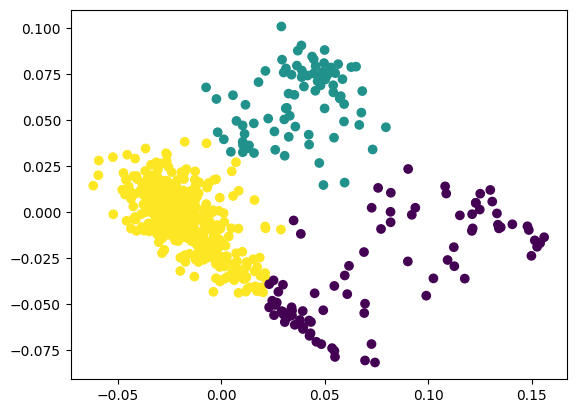

In [7]:
kmeans(pca_data,3)

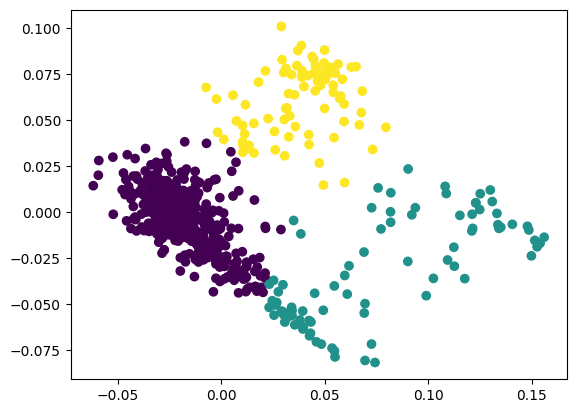

In [8]:
kmeans_pp(pca_data,3)

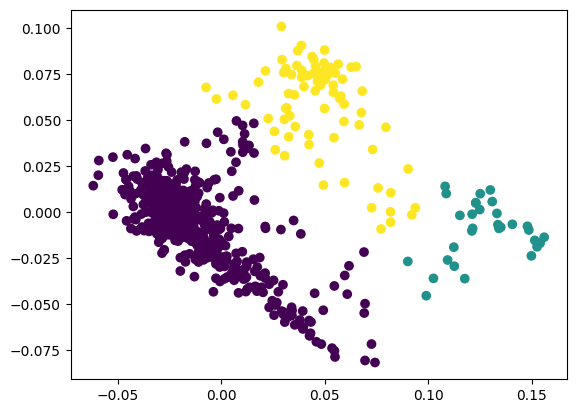

In [9]:
h_clustering_group_avg(pca_data,3)

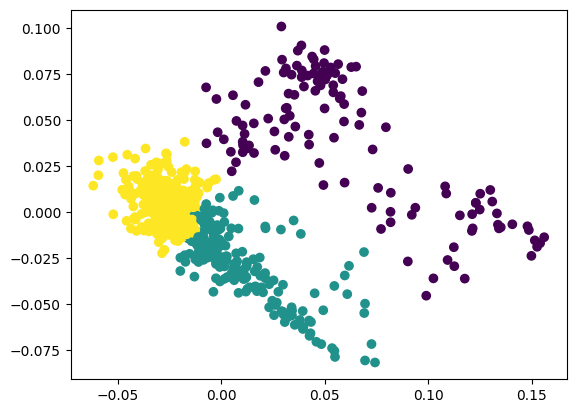

In [10]:
h_clustering_single_link(pca_data,3)

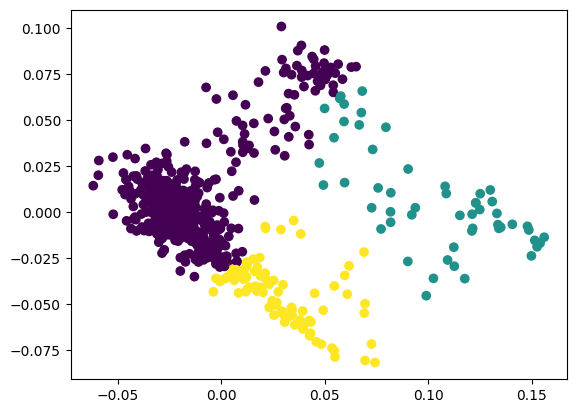

In [11]:
h_clustering_complete_link(pca_data,3)